In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [21]:
df = pd.read_csv("/kbopitchingdata.csv")

columns_to_keep = [
    'ERA', 'WHIP', 'strikeouts', 'complete_game', 'shutouts', 'saves',
    'innings_pitched', 'hits', 'runs', 'earned_runs', 'home_runs', 'walks', 'win_loss_percentage'
]

df = df[columns_to_keep]
df

,ERA,WHIP,strikeouts,complete_game,shutouts,saves,innings_pitched,hits,runs,earned_runs,home_runs,walks,win_loss_percentage
0,3.57,1.312,1062,0,18,32,1264.1,1117,557,501,79,542,0.558
1,3.67,1.316,1051,2,6,33,1255.0,1166,581,512,85,486,0.560
2,4.28,1.487,1037,2,10,27,1260.1,1288,653,599,104,586,0.519
3,4.29,1.450,1031,2,14,46,1250.0,1287,653,596,129,526,0.560
4,4.50,1.476,1046,3,10,33,1247.2,1256,686,624,122,585,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,3.19,1.260,318,32,4,10,725.1,625,318,257,41,289,0.700
319,3.51,1.298,394,19,8,15,708.1,660,350,276,52,259,0.582
320,3.95,1.435,363,26,4,4,713.2,763,385,313,69,261,0.388
321,3.76,1.403,348,24,2,3,707.9,698,388,296,50,295,0.475


In [22]:
# Identify missing values
df.replace("?", np.nan, inplace = True)
df.dropna(axis=0, inplace=True)
missing_values = df.isna().sum()
print(missing_values)
df

ERA                    0
WHIP                   0
strikeouts             0
complete_game          0
shutouts               0
saves                  0
innings_pitched        0
hits                   0
runs                   0
earned_runs            0
home_runs              0
walks                  0
win_loss_percentage    0
dtype: int64


,ERA,WHIP,strikeouts,complete_game,shutouts,saves,innings_pitched,hits,runs,earned_runs,home_runs,walks,win_loss_percentage
0,3.57,1.312,1062,0,18,32,1264.1,1117,557,501,79,542,0.558
1,3.67,1.316,1051,2,6,33,1255.0,1166,581,512,85,486,0.560
2,4.28,1.487,1037,2,10,27,1260.1,1288,653,599,104,586,0.519
3,4.29,1.450,1031,2,14,46,1250.0,1287,653,596,129,526,0.560
4,4.50,1.476,1046,3,10,33,1247.2,1256,686,624,122,585,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,3.19,1.260,318,32,4,10,725.1,625,318,257,41,289,0.700
319,3.51,1.298,394,19,8,15,708.1,660,350,276,52,259,0.582
320,3.95,1.435,363,26,4,4,713.2,763,385,313,69,261,0.388
321,3.76,1.403,348,24,2,3,707.9,698,388,296,50,295,0.475


In [28]:
X = df.drop(columns = ['win_loss_percentage'])
Y = df['win_loss_percentage']

In [31]:
# Use Standard Scaler instead of Min Max Scaler
scaler = StandardScaler()

# Fit data
X_train = scaler.fit_transform(X)

In [33]:
# Train and tests
X_train, X_test, Y_train, Y_test = train_test_split(
    X_train, Y, test_size = 0.3, random_state = 42)
Y_train.head()
Y_test.head()

173    0.469
132    0.447
197    0.569
9      0.474
104    0.641
Name: win_loss_percentage, dtype: float64

In [41]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [42]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [43]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
6/6 [==============================] - 1s 41ms/step - loss: 0.6925 - accuracy: 0.0000e+00 - val_loss: 0.6897 - val_accuracy: 0.0000e+00
Epoch 2/10
6/6 [==============================] - 0s 9ms/step - loss: 0.6882 - accuracy: 0.0000e+00 - val_loss: 0.6869 - val_accuracy: 0.0000e+00
Epoch 3/10
6/6 [==============================] - 0s 8ms/step - loss: 0.6867 - accuracy: 0.0000e+00 - val_loss: 0.6834 - val_accuracy: 0.0000e+00
Epoch 4/10
6/6 [==============================] - 0s 11ms/step - loss: 0.6852 - accuracy: 0.0000e+00 - val_loss: 0.6817 - val_accuracy: 0.0000e+00
Epoch 5/10
6/6 [==============================] - 0s 8ms/step - loss: 0.6844 - accuracy: 0.0000e+00 - val_loss: 0.6805 - val_accuracy: 0.0000e+00
Epoch 6/10
6/6 [==============================] - 0s 9ms/step - loss: 0.6838 - accuracy: 0.0000e+00 - val_loss: 0.6797 - val_accuracy: 0.0000e+00
Epoch 7/10
6/6 [==============================] - 0s 11ms/step - loss: 0.6835 - accuracy: 0.0000e+00 - val_loss: 0.6793 - 

In [45]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

4/4 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.0000e+00
Test Loss: 0.6862927675247192, Test Accuracy: 0.0


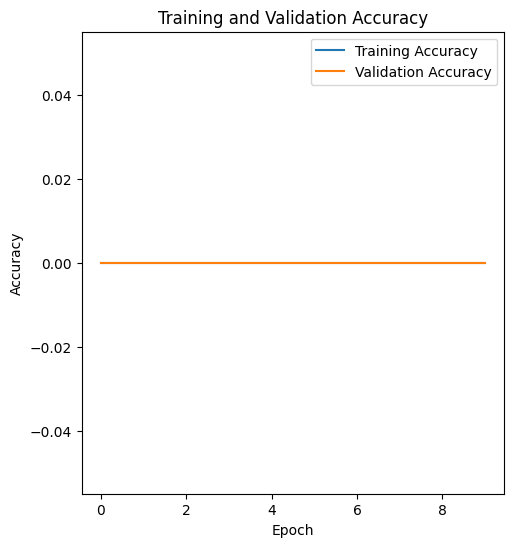

In [48]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

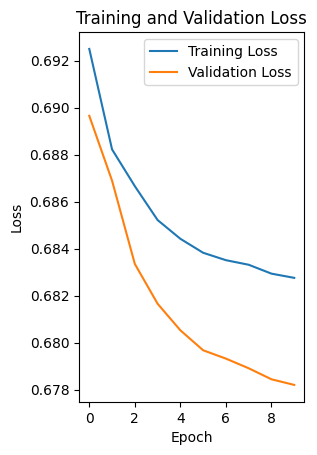

In [49]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [53]:
Y_pred = model.predict_classes(X_test)

# Create confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

AttributeError: 'Sequential' object has no attribute 'predict_classes'